<a href="https://colab.research.google.com/github/202535-368440/DA/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98%EC%9D%B4%ED%95%B4%EC%99%80%ED%99%9C%EC%9A%A9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
# 리눅스 서버에 크롬 브라우저를 설치합니다.
!apt-get update
!apt-get install -y chromium-browser

# 파이썬 라이브러리를 설치합니다.
!pip install selenium beautifulsoup4 webdriver-manager

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# (핵심) 코랩에서 셀레니움을 실행하기 위한 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless') # 헤드리스 모드: 화면 없는 브라우저
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu') # 일부 시스템에서 안정성 향상

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
print("드라이버 설정 완료. 스크래핑을 시작합니다.")

# 분석할 URL 주소 (땡겨요, 최근 30일)
url = "https://news.google.com/search?q=%EB%95%A1%EA%B2%A8%EC%9A%94&hl=ko&gl=KR&ceid=KR%3Ako&tbs=qdr:m"

# URL로 이동
driver.get(url)
time.sleep(2) # 페이지 초기 로딩 대기

# 기사 20개가 로드될 때까지 스크롤 반복
while True:
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    titles = soup.find_all('h4')

    print(f"현재 로드된 기사 수: {len(titles)}개")
    if len(titles) >= 20:
        break

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# 최종 결과 추출 및 출력
final_titles = [title.get_text() for title in titles[:20]]

print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
for i, title in enumerate(final_titles):
    print(f"{i+1}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cli.github.com/packages stable/main amd64 Packages [346 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,086 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packa

KeyboardInterrupt: 

In [2]:
#
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# (핵심) 코랩에서 셀레니움을 실행하기 위한 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless') # 헤드리스 모드: 화면 없는 브라우저
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu') # 일부 시스템에서 안정성 향상

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
print("드라이버 설정 완료. 스크래핑을 시작합니다.")

# 분석할 URL 주소 (땡겨요, 최근 30일)
url = "https://news.google.com/search?q=%EB%95%A1%EA%B2%A8%EC%9A%94%20when%3A30d&hl=ko&gl=KR&ceid=KR%3Ako"

# URL로 이동
driver.get(url)
time.sleep(2) # 페이지 초기 로딩 대기

# --- (핵심 수정 사항) 쿠키 동의 팝업창 처리 ---
try:
    # '모두 동의' 버튼이 나타날 때까지 최대 5초간 기다렸다가 클릭합니다.
    consent_button = WebDriverWait(driver, 5).until(
        EC.element_to_be_clickable((By.XPATH, '//button[contains(., "모두 동의")]'))
    )
    consent_button.click()
    print("팝업창의 '모두 동의' 버튼을 클릭했습니다.")
    time.sleep(2) # 팝업이 사라지고 컨텐츠가 로드될 시간을 줍니다.
except Exception as e:
    print("쿠키 동의 팝업이 나타나지 않았거나, 처리 중 오류가 발생했습니다.")

# --- 기사 20개가 로드될 때까지 스크롤 반복 ---
while True:
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    titles = soup.find_all('h4')

    print(f"현재 로드된 기사 수: {len(titles)}개")
    if len(titles) >= 20:
        break

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# 최종 결과 추출 및 출력
final_titles = [title.get_text() for title in titles[:20]]

print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
for i, title in enumerate(final_titles):
    print(f"{i+1}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

크롬 드라이버를 설정합니다...
드라이버 설정 완료. 스크래핑을 시작합니다.
쿠키 동의 팝업이 나타나지 않았거나, 처리 중 오류가 발생했습니다.
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개
현재 로드된 기사 수: 0개


KeyboardInterrupt: 

In [3]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
# 출력을 간결하게 하기 위해 > /dev/null 을 추가하여 설치 로그를 숨깁니다.
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# 봇 탐지를 우회하기 위한 브라우저 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless') # 화면 없는 브라우저
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
# '사람처럼' 보이게 하는 User-Agent 설정
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# (수정 완료) 사용자님이 요청하신 URL을 사용합니다.
url = "https://news.google.com/search?q=%EB%95%A1%EA%B2%A8%EC%9A%94&hl=ko&gl=KR&ceid=KR%3Ako"
driver.get(url)
print(f"페이지로 이동: {url}")

# 페이지에 기사 제목(h4)이 최소 1개라도 나타날 때까지 명시적으로 대기
try:
    # 페이지에 h4 태그가 로드될 때까지 최대 10초간 기다립니다.
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "h4"))
    )
    print("페이지에 기사 컨텐츠가 로드된 것을 확인했습니다.")
except Exception as e:
    print("페이지 로딩 시간 초과: 기사 컨텐츠(h4)를 찾지 못했습니다.")
    print("페이지의 현재 모습을 스크린샷으로 저장합니다. 'debug_screenshot.png' 파일을 확인해보세요.")
    driver.save_screenshot('debug_screenshot.png') # 디버깅을 위한 스크린샷 저장

# 기사 20개가 로드될 때까지 스크롤 반복
titles = []
while True:
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    current_titles = soup.find_all('h4')

    print(f"현재 로드된 기사 수: {len(current_titles)}개")
    if len(current_titles) >= 20:
        titles = current_titles
        break

    # 스크롤을 내렸는데도 기사 수가 늘지 않으면 더 이상 로드할 내용이 없는 것이므로 중단
    last_count = len(current_titles)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2) # 스크롤 후 새 기사가 로드될 때까지 대기

    # 스크롤 후 다시 기사 수를 세어보고, 변화가 없으면 루프 탈출
    new_titles_soup = BeautifulSoup(driver.page_source, 'html.parser')
    if len(new_titles_soup.find_all('h4')) == last_count:
        print("더 이상 로드할 기사가 없습니다.")
        titles = new_titles_soup.find_all('h4')
        break

# 최종 결과 추출 및 출력
final_titles = [title.get_text() for title in titles[:20]]

print("\n--- 스크래핑 결과 ---")
for i, title in enumerate(final_titles):
    print(f"{i+1}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.
페이지로 이동: https://news.google.com/search?q=%EB%95%A1%EA%B2%A8%EC%9A%94&hl=ko&gl=KR&ceid=KR%3Ako
페이지 로딩 시간 초과: 기사 컨텐츠(h4)를 찾지 못했습니다.
페이지의 현재 모습을 스크린샷으로 저장합니다. 'debug_screenshot.png' 파일을 확인해보세요.
현재 로드된 기사 수: 0개
더 이상 로드할 기사가 없습니다.

--- 스크래핑 결과 ---

총 0개의 기사 제목을 가져왔습니다. 👍


In [4]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# (가장 중요) 셀레니움이 자동화 프로그램이라는 사실을 숨기는 옵션 추가
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
# 아래 두 옵션이 '자동화된 테스트 소프트웨어에 의해 제어되고 있습니다' 메시지를 숨기고 봇 탐지를 우회하는 핵심입니다.
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', {
          get: () => undefined
        })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# 사용자님이 요청하신 URL을 사용합니다.
url = "https://news.google.com/search?q=%EB%95%A1%EA%B2%A8%EC%9A%94&hl=ko&gl=KR&ceid=KR%3Ako"
driver.get(url)
print(f"페이지로 이동: {url}")

# 페이지에 기사 제목(h4)이 최소 1개라도 나타날 때까지 명시적으로 대기
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "h4"))
    )
    print("페이지에 기사 컨텐츠가 로드된 것을 확인했습니다.")
except Exception as e:
    print("❌ 페이지 로딩 시간 초과: 기사 컨텐츠(h4)를 찾지 못했습니다.")
    print("페이지의 현재 모습을 스크린샷으로 저장합니다. 코랩 왼쪽 파일 메뉴에서 'debug_screenshot.png' 파일을 확인해보세요.")
    driver.save_screenshot('debug_screenshot.png')
    driver.quit() # 에러 발생 시 드라이버 종료

# 기사 20개가 로드될 때까지 스크롤 반복
titles = []
if driver: # 드라이버가 정상 실행 중일 때만 스크롤 시작
    while True:
        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')
        current_titles = soup.find_all('h4')

        print(f"현재 로드된 기사 수: {len(current_titles)}개")
        if len(current_titles) >= 20:
            titles = current_titles
            break

        last_count = len(current_titles)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

        new_titles_soup = BeautifulSoup(driver.page_source, 'html.parser')
        if len(new_titles_soup.find_all('h4')) == last_count:
            print("더 이상 로드할 기사가 없습니다.")
            titles = new_titles_soup.find_all('h4')
            break

    # 최종 결과 추출 및 출력
    final_titles = [title.get_text() for title in titles[:20]]

    print("\n--- 스크래핑 결과 ---")
    for i, title in enumerate(final_titles):
        print(f"{i+1}. {title}")

    print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")
    driver.quit() # 사용이 끝난 브라우저 종료

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.
페이지로 이동: https://news.google.com/search?q=%EB%95%A1%EA%B2%A8%EC%9A%94&hl=ko&gl=KR&ceid=KR%3Ako


❌ 페이지 로딩 시간 초과: 기사 컨텐츠(h4)를 찾지 못했습니다.
페이지의 현재 모습을 스크린샷으로 저장합니다. 코랩 왼쪽 파일 메뉴에서 'debug_screenshot.png' 파일을 확인해보세요.


MaxRetryError: HTTPConnectionPool(host='localhost', port=59795): Max retries exceeded with url: /session/7393d8f21ee4abdeaf8ccf4bc4734ecd/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7dde20437ec0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [5]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
# 설치 로그를 숨겨 출력을 깔끔하게 합니다.
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

# (중요) 봇 탐지를 우회하고 안정성을 높이는 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless') # 화면 없는 브라우저
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
# '사람처럼' 보이게 하는 User-Agent 설정
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
# 자동화 탐지를 피하는 핵심 옵션
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
# 자동화 탐지를 위한 navigator.webdriver 속성을 제거합니다.
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', { get: () => undefined })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# (수정 완료) 사용자님이 요청하신 Daum 뉴스 URL을 사용합니다.
url = "https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m"
driver.get(url)
print(f"페이지로 이동: {url}")
time.sleep(2) # 페이지 초기 로딩 대기

# '더보기' 버튼을 클릭하여 기사 20개 이상 로드
while True:
    # 현재 페이지에서 기사 제목 수 확인
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    # Daum 뉴스의 제목은 class='tit_main'을 가진 <a> 태그 안에 있습니다.
    titles = soup.find_all('a', class_='tit_main')

    print(f"현재 로드된 기사 수: {len(titles)}개")
    if len(titles) >= 20:
        break

    # '더보기' 버튼 찾아서 클릭
    try:
        # Daum의 '더보기' 버튼은 class='btn_more' 입니다.
        more_button = driver.find_element(By.CLASS_NAME, 'btn_more')
        more_button.click()
        print("'더보기' 버튼을 클릭했습니다.")
        time.sleep(1.5) # 컨텐츠가 로드될 때까지 잠시 대기
    except Exception as e:
        print("더 이상 '더보기' 버튼이 없습니다. 스크래핑을 종료합니다.")
        break # 버튼이 없으면 반복 중단

# 최종 결과 추출 및 출력
final_titles = [title.get_text().strip() for title in titles[:20]]

print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
for i, title in enumerate(final_titles, 1):
    print(f"{i}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.
페이지로 이동: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 0개
'더보기' 버튼을 

KeyboardInterrupt: 

In [6]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# 봇 탐지를 우회하고 안정성을 높이는 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', { get: () => undefined })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# 사용자님이 요청하신 Daum 뉴스 URL을 사용합니다.
url = "https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%!A(MISSING)1%81%EA%B2%A8%EC%9A%94&period=m"
driver.get(url)
print(f"페이지로 이동: {url}")

# --- (핵심 수정) ---
# 1. 페이지의 뉴스 목록 컨테이너가 로드될 때까지 명시적으로 대기합니다.
try:
    # 뉴스 목록 전체를 감싸는 ul 태그 (class='c-list-basic')가 나타날 때까지 최대 10초 대기
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "ul.c-list-basic"))
    )
    print("뉴스 목록 컨테이너 로드를 확인했습니다.")
except Exception as e:
    print("❌ 페이지 로딩 시간 초과: 뉴스 목록을 찾지 못했습니다.")
    print("페이지의 현재 모습을 스크린샷으로 저장합니다. 'debug_screenshot.png' 파일을 확인해보세요.")
    driver.save_screenshot('debug_screenshot.png')
    driver.quit()

# '더보기' 버튼을 클릭하여 기사 20개 이상 로드
while True:
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    # 2. (핵심 수정) 기사 제목을 찾는 CSS 선택자를 더 구체적으로 변경합니다.
    # div 태그 중 class가 'wrap_tit'인 것 바로 아래의 a 태그를 찾습니다.
    titles = soup.select('div.wrap_tit > a')

    print(f"현재 로드된 기사 수: {len(titles)}개")
    if len(titles) >= 20:
        break

    try:
        more_button = driver.find_element(By.CLASS_NAME, 'btn_more')
        more_button.click()
        print("'더보기' 버튼을 클릭했습니다.")
        # 더보기 클릭 후, 새 컨텐츠가 로드될 시간을 확실히 주기 위해 대기 시간을 조금 늘립니다.
        time.sleep(2)
    except Exception as e:
        print("더 이상 '더보기' 버튼이 없습니다. 스크래핑을 종료합니다.")
        break

# 최종 결과 추출
final_titles = [title.get_text().strip() for title in titles[:20]]

print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
for i, title in enumerate(final_titles, 1):
    print(f"{i}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.
페이지로 이동: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%!A(MISSING)1%81%EA%B2%A8%EC%9A%94&period=m


❌ 페이지 로딩 시간 초과: 뉴스 목록을 찾지 못했습니다.
페이지의 현재 모습을 스크린샷으로 저장합니다. 'debug_screenshot.png' 파일을 확인해보세요.


MaxRetryError: HTTPConnectionPool(host='localhost', port=52133): Max retries exceeded with url: /session/b375fd3ab1f58cfc404cf949b7258782/source (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7dde207fe7b0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [7]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# 봇 탐지를 우회하고 안정성을 높이는 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', { get: () => undefined })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# Daum 뉴스 URL
url = "https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m"
driver.get(url)
print(f"페이지로 이동: {url}")

# --- (핵심 수정) 페이지 로딩 성공 여부를 변수에 저장 ---
page_loaded_successfully = False
try:
    # 뉴스 목록 컨테이너가 나타날 때까지 최대 10초 대기
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "ul.c-list-basic"))
    )
    print("뉴스 목록 컨테이너 로드를 확인했습니다.")
    page_loaded_successfully = True # 성공 플래그 설정
except Exception as e:
    print("❌ 페이지 로딩 시간 초과: 뉴스 목록을 찾지 못했습니다.")
    print("페이지의 현재 모습을 스크린샷으로 저장합니다. 코랩 왼쪽 파일 메뉴에서 'debug_screenshot.png' 파일을 확인해보세요.")
    driver.save_screenshot('debug_screenshot.png')

# --- (핵심 수정) 페이지가 성공적으로 로드된 경우에만 스크래핑 실행 ---
if page_loaded_successfully:
    while True:
        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')
        titles = soup.select('div.wrap_tit > a')

        print(f"현재 로드된 기사 수: {len(titles)}개")
        if len(titles) >= 20:
            break

        try:
            more_button = driver.find_element(By.CLASS_NAME, 'btn_more')
            more_button.click()
            print("'더보기' 버튼을 클릭했습니다.")
            time.sleep(2)
        except Exception as e:
            print("더 이상 '더보기' 버튼이 없습니다. 스크래핑을 종료합니다.")
            break

    # 최종 결과 추출
    final_titles = [title.get_text().strip() for title in titles[:20]]

    print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
    for i, title in enumerate(final_titles, 1):
        print(f"{i}. {title}")

    print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.
페이지로 이동: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m
뉴스 목록 컨테이너 로드를 확인했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 로드된 기사 수: 3개
'더보기' 버튼을 클릭했습니다.
현재 

KeyboardInterrupt: 

In [9]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# 봇 탐지를 우회하고 안정성을 높이는 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', { get: () => undefined })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# (수정) 페이지 번호 부분을 제외한 기본 URL
base_url = "https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m"

# 모든 페이지의 기사 제목을 저장할 빈 리스트 생성
all_titles = []
# 20개 이상의 기사를 얻기 위해 1~3페이지를 스크래핑합니다.
pages_to_scrape = 3

# --- (핵심 수정) 페이지 번호를 바꿔가며 접속하는 반복문 ---
for page_num in range(1, pages_to_scrape + 1):
    # 접속할 페이지의 전체 URL 생성 (2페이지부터는 &p=페이지번호 가 붙습니다)
    if page_num > 1:
        url = f"{base_url}&p={page_num}"
    else:
        url = base_url

    print(f"\n{page_num} 페이지로 이동합니다: {url}")
    driver.get(url)

    try:
        # 페이지의 뉴스 목록 컨테이너가 로드될 때까지 최대 10초 대기
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "ul.c-list-basic"))
        )

        # 현재 페이지의 HTML을 가져와서 기사 제목 추출
        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')
        titles_on_page = soup.select('div.wrap_tit > a')

        print(f"{page_num} 페이지에서 {len(titles_on_page)}개의 기사를 찾았습니다.")
        all_titles.extend(titles_on_page) # 찾은 기사들을 전체 리스트에 추가
        time.sleep(1) # 서버에 부담을 주지 않기 위해 1초 대기

    except Exception as e:
        print(f"{page_num} 페이지 처리 중 오류 발생: {e}")
        break # 오류 발생 시 반복 중단

# --- 최종 결과 추출 ---
final_titles = [title.get_text().strip() for title in all_titles[:20]]

print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
for i, title in enumerate(final_titles, 1):
    print(f"{i}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.

1 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m
1 페이지에서 3개의 기사를 찾았습니다.

2 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=2
2 페이지에서 9개의 기사를 찾았습니다.

3 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=3
3 페이지에서 0개의 기사를 찾았습니다.

--- 스크래핑 결과 (기사 제목 20개) ---
1. 이데일리
2. 아시아경제
3. SBS Biz
4. 헤럴드경제
5. 더팩트
6. 뉴스1
7. 서울경제
8. 디지털타임스
9. 아시아경제
10. 연합뉴스
11. 세계일보
12. 강원일보

총 12개의 기사 제목을 가져왔습니다. 👍


In [10]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# 봇 탐지를 우회하고 안정성을 높이는 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', { get: () => undefined })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# 페이지 번호 부분을 제외한 기본 URL
base_url = "https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m"

# 모든 페이지의 기사 제목을 저장할 빈 리스트 생성
all_titles = []
pages_to_scrape = 5 # 20개 이상 기사를 위해 1~3페이지 스크래핑

# 페이지 번호를 바꿔가며 접속하는 반복문
for page_num in range(1, pages_to_scrape + 1):
    if page_num > 1:
        url = f"{base_url}&p={page_num}"
    else:
        url = base_url

    print(f"\n{page_num} 페이지로 이동합니다: {url}")
    driver.get(url)

    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "ul.c-list-basic"))
        )

        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')

        # --- (핵심 수정!) ---
        # 알려주신 대로, c-item-content 라는 div 내부에서만 제목을 찾도록 선택자를 수정합니다.
        titles_on_page = soup.select('div.c-item-content div.wrap_tit > a')

        print(f"{page_num} 페이지에서 {len(titles_on_page)}개의 기사를 찾았습니다.")
        all_titles.extend(titles_on_page)
        time.sleep(1)

    except Exception as e:
        print(f"{page_num} 페이지 처리 중 오류 발생: {e}")
        break

# 최종 결과 추출
final_titles = [title.get_text().strip() for title in all_titles[:20]]

print("\n--- 스크래핑 결과 (기사 제목 20개) ---")
for i, title in enumerate(final_titles, 1):
    print(f"{i}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.

1 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m
1 페이지에서 0개의 기사를 찾았습니다.

2 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=2
2 페이지에서 0개의 기사를 찾았습니다.

3 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=3
3 페이지에서 0개의 기사를 찾았습니다.

4 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=4
4 페이지에서 0개의 기사를 찾았습니다.

5 페이지로 이동합니다: https://search.daum.net/search?w=ne

In [14]:
# --- 1. 코랩 환경에 필요한 모든 것 설치하기 ---
# 설치 로그를 숨겨 출력을 깔끔하게 합니다.
!apt-get update > /dev/null
!apt-get install -y chromium-browser > /dev/null
!pip install selenium beautifulsoup4 webdriver-manager > /dev/null
print("✅ 필요한 패키지 설치 완료!")

# --- 2. 파이썬 스크래핑 코드 실행 ---
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# 봇 탐지를 우회하고 안정성을 높이는 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-gpu')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# 크롬 드라이버를 설정하고 브라우저를 실행합니다.
print("⚙️ 크롬 드라이버를 설정합니다...")
driver = webdriver.Chrome(options=options)
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """
        Object.defineProperty(navigator, 'webdriver', { get: () => undefined })
    """
})
print("🚀 드라이버 설정 완료. 스크래핑을 시작합니다.")

# 페이지 번호 부분을 제외한 기본 URL
base_url = "https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m"

# 모든 페이지의 기사 제목을 저장할 빈 리스트 생성
all_titles = []
pages_to_scrape = 5 # 20개 이상 기사를 위해 1~3페이지 스크래핑

# 페이지 번호를 바꿔가며 접속하는 반복문
for page_num in range(1, pages_to_scrape + 1):
    if page_num > 1:
        url = f"{base_url}&p={page_num}"
    else:
        url = base_url

    print(f"\n{page_num} 페이지로 이동합니다: {url}")
    driver.get(url)

    try:
        # 뉴스 목록 컨테이너가 로드될 때까지 대기
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "ul.c-list-basic"))
        )

        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')

        # --- (핵심 수정!) ---
        # 알려주신 정확한 위치를 CSS 선택자로 지정합니다.
        # ""div.item-title" 바로 아래 "a" 태그를 찾습니다.
        titles_on_page = soup.select('div.item-title > strong > a')

        print(f"{page_num} 페이지에서 {len(titles_on_page)}개의 기사를 찾았습니다.")
        all_titles.extend(titles_on_page)
        time.sleep(1) # 서버에 부담을 주지 않기 위해 1초 대기

    except Exception as e:
        print(f"{page_num} 페이지 처리 중 오류 발생: {e}")
        break

# 최종 결과 추출
final_titles = [title.get_text().strip() for title in all_titles[:50]]

print("\n--- 스크래핑 결과 (기사 제목 30개) ---")
for i, title in enumerate(final_titles, 1):
    print(f"{i}. {title}")

print(f"\n총 {len(final_titles)}개의 기사 제목을 가져왔습니다. 👍")

# 사용이 끝난 브라우저 종료
driver.quit()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 필요한 패키지 설치 완료!
⚙️ 크롬 드라이버를 설정합니다...
🚀 드라이버 설정 완료. 스크래핑을 시작합니다.

1 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m
1 페이지에서 10개의 기사를 찾았습니다.

2 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=2
2 페이지에서 10개의 기사를 찾았습니다.

3 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=3
3 페이지에서 10개의 기사를 찾았습니다.

4 페이지로 이동합니다: https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q=%EB%95%A1%EA%B2%A8%EC%9A%94&period=m&p=4
4 페이지에서 10개의 기사를 찾았습니다.

5 페이지로 이동합니다: https://search.daum.net/search?

In [15]:
!pip install requests pandas tqdm

import requests, json, re, pandas as pd
from tqdm import tqdm

APP_ID = "com.shinhan.o2o"
BASE_URL = "https://play.google.com/_/PlayStoreUi/data/batchexecute"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Content-Type": "application/x-www-form-urlencoded;charset=UTF-8",
}

def get_reviews(token=None):
    data = {
        "f.req": json.dumps([
            [
                "oCPkwe",
                json.dumps([None, APP_ID, ["null", token], 100]),
                None,
                "generic"
            ]
        ])
    }
    r = requests.post(BASE_URL, headers=headers, data=data, params={"hl":"ko"})
    r.raise_for_status()
    txt = r.text
    try:
        match = re.search(r'\[\"(.*)\"]', txt)
        jdata = json.loads(match.group(0))
        reviews_block = json.loads(jdata[0][2])
    except Exception as e:
        return None, []
    try:
        next_token = reviews_block[0][2][1][1]
    except:
        next_token = None
    reviews_raw = reviews_block[0][2][0]
    parsed = []
    for r in reviews_raw:
        parsed.append({
            "author": r[1][0],
            "rating": r[2],
            "date": r[5][0],
            "text": r[4],
            "thumbs_up": r[6],
        })
    return next_token, parsed

all_reviews = []
token = None

for _ in tqdm(range(5)):  # 반복 횟수 조정 가능 (1회당 최대 100개)
    token, reviews = get_reviews(token)
    if not reviews:
        break
    all_reviews.extend(reviews)
    if not token:
        break

df = pd.DataFrame(all_reviews)
df.to_csv("ddangyo_reviews.csv", index=False, encoding="utf-8-sig")
df.head()


  0%|          | 0/5 [00:00<?, ?it/s]


HTTPError: 400 Client Error: Bad Request for url: https://play.google.com/_/PlayStoreUi/data/batchexecute?hl=ko

In [18]:
!pip install google-play-scraper pandas

from google_play_scraper import reviews, Sort
import pandas as pd

app_id = "com.shinhan.o2o"

result, _ = reviews(
    app_id,
    lang='ko',
    country='kr',
    sort=Sort.NEWEST,
    count=1000,  # 최대 500개
)

df = pd.DataFrame(result)
df.to_csv("ddangyo_reviews.csv", index=False, encoding="utf-8-sig")
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f3fa73a1-1c6b-4a5a-8262-96b6759f44aa,도진,https://play-lh.googleusercontent.com/a/ACg8oc...,온누리사용가능 굿,4,0,1.9.2,2025-10-22 01:43:09,None,NaT,1.9.2
1,d559faea-c4dc-49cb-872f-d0f6b4e4beee,반만고양이 (반만고양이),https://play-lh.googleusercontent.com/a/ACg8oc...,좋아요,5,0,None,2025-10-21 20:40:19,None,NaT,None
2,e6e4a864-a7ae-48c6-ac6d-8383f7e43f3d,다엘,https://play-lh.googleusercontent.com/a/ACg8oc...,쿠폰도 많이 주고 타임할인에 자주 시키는 곳들이 많아서 좋은데 고객센터랑 연결이 너...,3,0,1.9.1,2025-10-21 17:22:01,None,NaT,1.9.1
3,06988920-0d86-4b65-bb9a-e1321cbda91c,진영종,https://play-lh.googleusercontent.com/a-/ALV-U...,땡겨요 잘되길,5,0,1.9.2,2025-10-21 16:58:22,None,NaT,1.9.2
4,65a9662b-a73c-4492-ad6a-fe706c7002c0,윤소은,https://play-lh.googleusercontent.com/a/ACg8oc...,배민보다 음식값이 많이 저렴하고 쿠폰빵빵해좋음,5,0,1.9.1,2025-10-21 15:05:05,None,NaT,1.9.1


In [19]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/15LjsIzbhHHMxUoPkPK0GroSG4I-eMVHENBKaZEdYBRM/edit#gid=0


In [20]:
from google.colab import files

df.to_csv("ddangyo_reviews.csv", index=False, encoding="utf-8-sig")
files.download("ddangyo_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import pandas as pd

# CSV 파일을 pandas 데이터프레임으로 불러옵니다.

df = pd.read_csv('ddangyo_reviews.csv')
print("✅ 'ddangyo_reviews.csv' 파일을 성공적으로 불러왔습니다.")

df['at'].dtype

✅ 'ddangyo_reviews.csv' 파일을 성공적으로 불러왔습니다.


dtype('O')

In [23]:
# --- 데이터 처리 ---
# 1. 'at' 열을 날짜/시간 데이터로 변환합니다. (오류 발생 시 해당 행은 제외)
df['at'] = pd.to_datetime(df['at'], errors='coerce')

# 날짜 변환에 실패한 행은 제거합니다.
df.dropna(subset=['at'], inplace=True)

# 2. 기준 날짜를 설정합니다.
cutoff_date = pd.to_datetime('2025-09-22')

# 3. 기준 날짜 이후의 데이터만 남깁니다.
filtered_df = df[df['at'] >= cutoff_date].copy()
print(f"필터링 완료: {cutoff_date.date()} 이후의 리뷰만 남겼습니다.")

필터링 완료: 2025-09-22 이후의 리뷰만 남겼습니다.


In [28]:
filtered_df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
867,b89462cd-f38b-4829-9da7-0f1768cfabb5,송파끼룩이,https://play-lh.googleusercontent.com/a/ACg8oc...,할인혜택이 많아서 좋아요,5,0,1.9.1,2025-09-22 04:05:59,NaN,NaN,1.9.1
868,ece9b0e8-3731-4993-b88b-5378c774cd6b,치마요Chimayo,https://play-lh.googleusercontent.com/a/ACg8oc...,평소에 잘 쓰다가 이번에 픽업주문으로 크게 낭패볼 뻔한 일이 있었습니다. 당연히 집...,4,3,1.9.1,2025-09-22 03:49:52,NaN,NaN,1.9.1
869,ca8f98ba-7a74-41bf-9e3d-50e280e95c9e,아미,https://play-lh.googleusercontent.com/a/ACg8oc...,이벤트도 많고 좋아요,5,0,1.9.1,2025-09-22 03:25:33,NaN,NaN,1.9.1
870,0e0f5b28-d55c-4546-b381-2e328bbc39a2,이승민,https://play-lh.googleusercontent.com/a-/ALV-U...,2번 주문 시 무제한 10000원쿠폰 좋아요,5,1,1.9.1,2025-09-22 02:23:08,NaN,NaN,1.9.1
871,7833b50b-6f1f-47ff-9bdd-d3db2756ff4c,반짝반짝,https://play-lh.googleusercontent.com/a-/ALV-U...,이것만 쓸라니까 빠른 업뎃 부탁드립니다 1. 매뉴 누르면 후기 바로가기 버튼 생성해...,5,0,NaN,2025-09-22 01:34:51,NaN,NaN,NaN


In [29]:
#edit_df = filtered_df[['content', 'at']].copy()
edit_df.tail()

,content,at
0,온누리사용가능 굿,2025-10-22 01:43:09
1,좋아요,2025-10-21 20:40:19
2,쿠폰도 많이 주고 타임할인에 자주 시키는 곳들이 많아서 좋은데 고객센터랑 연결이 너...,2025-10-21 17:22:01
3,땡겨요 잘되길,2025-10-21 16:58:22
4,배민보다 음식값이 많이 저렴하고 쿠폰빵빵해좋음,2025-10-21 15:05:05


In [30]:
edit_df.to_csv("ddangyo_reviews_edit.csv", index=False, encoding="utf-8-sig")

In [32]:
import pandas as pd

df = pd.read_csv("ddangyo_reviews_edit.csv")
df.head()

,content,at
0,온누리사용가능 굿,2025-10-22 01:43:09
1,좋아요,2025-10-21 20:40:19
2,쿠폰도 많이 주고 타임할인에 자주 시키는 곳들이 많아서 좋은데 고객센터랑 연결이 너...,2025-10-21 17:22:01
3,땡겨요 잘되길,2025-10-21 16:58:22
4,배민보다 음식값이 많이 저렴하고 쿠폰빵빵해좋음,2025-10-21 15:05:05


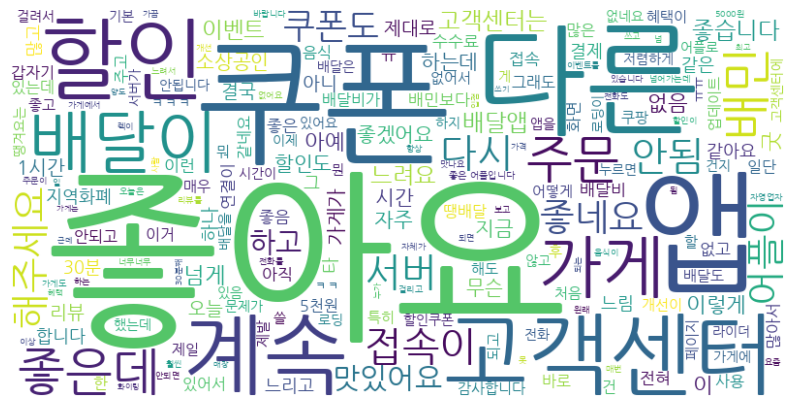

In [38]:
!apt-get -qq install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(df['content'].astype(str))

# 불용어(제외할 단어)
stopwords = set([
    "좀", "잘", "진짜", "너무", "정말", "조금", "되게", "완전",
    "그냥", "약간", "아주", "많이", "그리고", "이건", "그건",
    "거의", "또", "또한", "때문", "것", "거", "해서", "하면",
    "땡겨요", "배달", "안", "앱이", "왜", "어플", "더", "다"
])

wc = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords
).generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


✅ kiwipiepy 라이브러리 설치 완료!
✅ 명사 추출 및 텍스트 병합 완료.


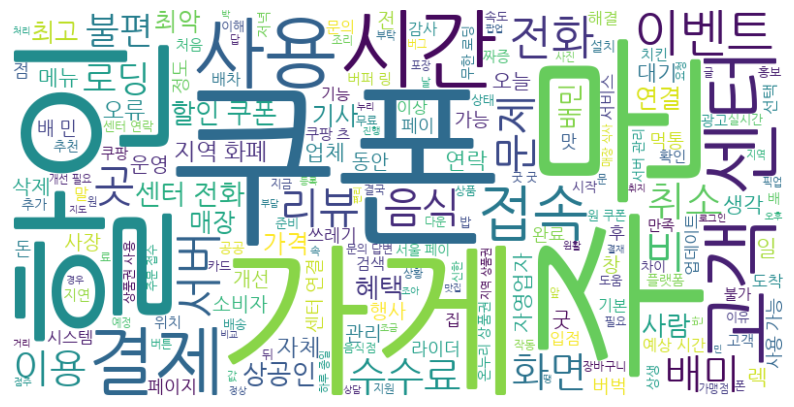

In [41]:
# --- 1. Kiwi 형태소 분석기 설치 ---
!pip install kiwipiepy > /dev/null
print("✅ kiwipiepy 라이브러리 설치 완료!")

# --- 2. 라이브러리 불러오기 ---
!apt-get -qq install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from kiwipiepy import Kiwi # Kiwi 임포트

# --- 3. 명사 추출 ---
# Kiwi 객체 생성
kiwi = Kiwi()

# df['content']의 각 리뷰에서 명사만 추출하여 하나의 리스트로 만듭니다.
all_nouns = []
for review in df['content'].astype(str):
    # kiwi.analyze()로 형태소 분석을 수행하고, 태그가 'NNG' 또는 'NNP'인 명사만 골라냅니다.
    result = kiwi.analyze(review)
    for token in result[0][0]:
        if token.tag in ['NNG', 'NNP']: # 일반 명사, 고유 명사
            all_nouns.append(token.form)

# 추출된 명사들을 하나의 긴 텍스트로 합칩니다.
text = " ".join(all_nouns)
print("✅ 명사 추출 및 텍스트 병합 완료.")

# --- 4. 워드클라우드 생성 (기존 코드와 동일) ---
# 불용어(제외할 단어)
stopwords = set([
    "땡겨요", "배달", "앱", "어플", "때"
])

# 워드클라우드 생성
wc = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
!pip install transformers torch tqdm > /dev/null

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

model_name = "beomi/KcELECTRA-base-v2022"  # 한국어 감성분석용
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiment(texts):
    results = []
    for t in tqdm(texts):
        inputs = tokenizer(t, return_tensors="pt", truncation=True, max_length=256)
        with torch.no_grad():
            logits = model(**inputs).logits
        pred = torch.argmax(logits, dim=1).item()
        results.append(pred)
    return results

# 감성분석 실행
sample_texts = df['content'].astype(str).tolist()
df['sentiment'] = predict_sentiment(sample_texts)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/504 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

100%|██████████| 872/872 [02:21<00:00,  6.16it/s]


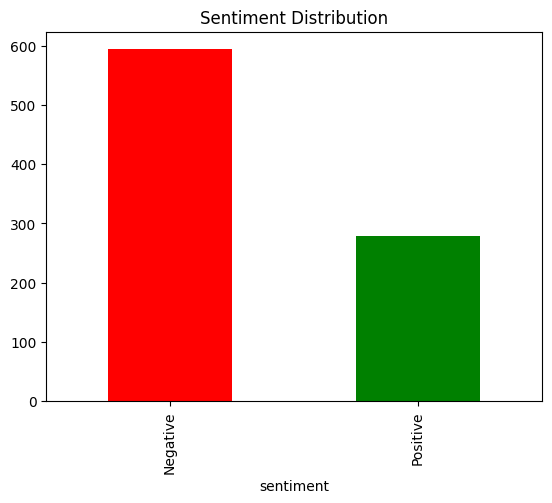

In [43]:
df['sentiment'].value_counts().plot(kind='bar', color=['red','green'])
plt.title("Sentiment Distribution")
plt.xticks([0,1], ['Negative','Positive'])
plt.show()


In [44]:
df.tail()

,content,at,sentiment
867,할인혜택이 많아서 좋아요,2025-09-22 04:05:59,1
868,평소에 잘 쓰다가 이번에 픽업주문으로 크게 낭패볼 뻔한 일이 있었습니다. 당연히 집...,2025-09-22 03:49:52,1
869,이벤트도 많고 좋아요,2025-09-22 03:25:33,1
870,2번 주문 시 무제한 10000원쿠폰 좋아요,2025-09-22 02:23:08,0
871,이것만 쓸라니까 빠른 업뎃 부탁드립니다 1. 매뉴 누르면 후기 바로가기 버튼 생성해...,2025-09-22 01:34:51,0
